# Project 2 - Prediction of Buying Personal Loan/ Banking Data

- Name - Amit Kumar Maiti
- Course- Supervised Learning 
- Deadline - Mar 1, 2020

### Data Gathering & EDA

In [1]:
# Importing python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Others important libraries are imported in respective places

In [2]:
# Loading/Reading Data
loan_data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
# First five rows of the loan data
loan_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
# Last five rows of the data
loan_data.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [5]:
# Shape of the data
loan_data.shape

(5000, 14)

* The dataset has 5000 rows and 14 columns (features/variables)

In [6]:
# Data type
loan_data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

* Data Types: At a glance all the features seems to be numerical out of which CCAvg is float type and rest are integer type.
    - Per observation, Age, Experience, Income, Family, CCAvg, Mortgage are continuous variables
    - Even though 'Zip Code' seems to be integer but it should not be treated as continuous variable becasue it's value
        denotes geographical location. It needs to be encoded to use in the model.
    - Education is Categorical variable which is alreday encoded 
    - Perosnal loan, Securities Account, CD Account, Online, CreditCard: these are also categorical variables as it's values
        represents as 'yes' or 'no'. These are also encoded in the dataset as 1 or 0

In [7]:
# Data Info:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
# Columns of data
loan_data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [9]:
# Renaming the column names for convinient sake and easy usuablity 
# (all letetrs are in lower case & works are seperated by '_')
cols = ['id', 'age', 'experience', 'income', 'zip_code', 'family', 'ccavg', 'education', 'mortgage', 
        'personal_loan', 'securities_account', 'cd_account', 'online', 'credit_card']
loan_data.columns = cols
loan_data.head()

,id,age,experience,income,zip_code,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,credit_card
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


- Renaming all the variables with lower case letter and removing space helps in easy usuability

##### Experience Column-
In Experience column there were some negative values as experience could not negative in real world. Negative value in 
experience column represents an error in data collection. Either it could be zero or positive. I've replaced those negative
experience values with their absolute values manually. 

In [10]:
# Checking missing data
loan_data.isna().apply(pd.value_counts)

,id,age,experience,income,zip_code,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,credit_card
False,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


- There are no missing values in any column

In [11]:
# Descriptive Statistics
loan_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
zip_code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
ccavg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
personal_loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


##### Descriptive Statistics:
- Customer's 'age' varies from young 23 years to old 67 years wherein mean age is 45 years old. 
- People haveing average 'experience' is around 20 years.
- Average 'income' of people is '73K' dollar.
* Average 'family' members of customer is 2.
* Average monthly 'credit card spending' is '1.9K' dollar whereas highest spending is '10K'dollar.
* Average 'mortgage' amount is '56K' dollar.

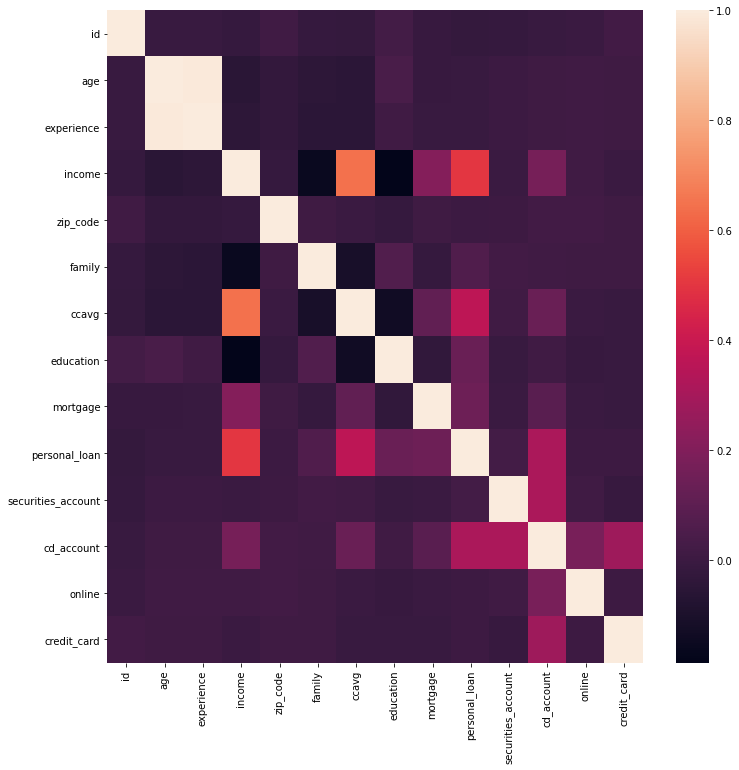

In [12]:
# Corelation
plt.figure(figsize = (12,12))
sns.heatmap(loan_data.corr())

##### Co-rellation:
- Co-rellation varies from -1 to +1
- Darker color shows no positive co-rellation & lighter color shows higher positive linear relation.
- 'age' & 'experience' have very high linear corelation 
- 'income' has positive co-rellation with 'personal loan', 'mortage', 'avg. credit card spending' respectivelly.
- But 'income' and 'edcucation' hos no linera co-relation.

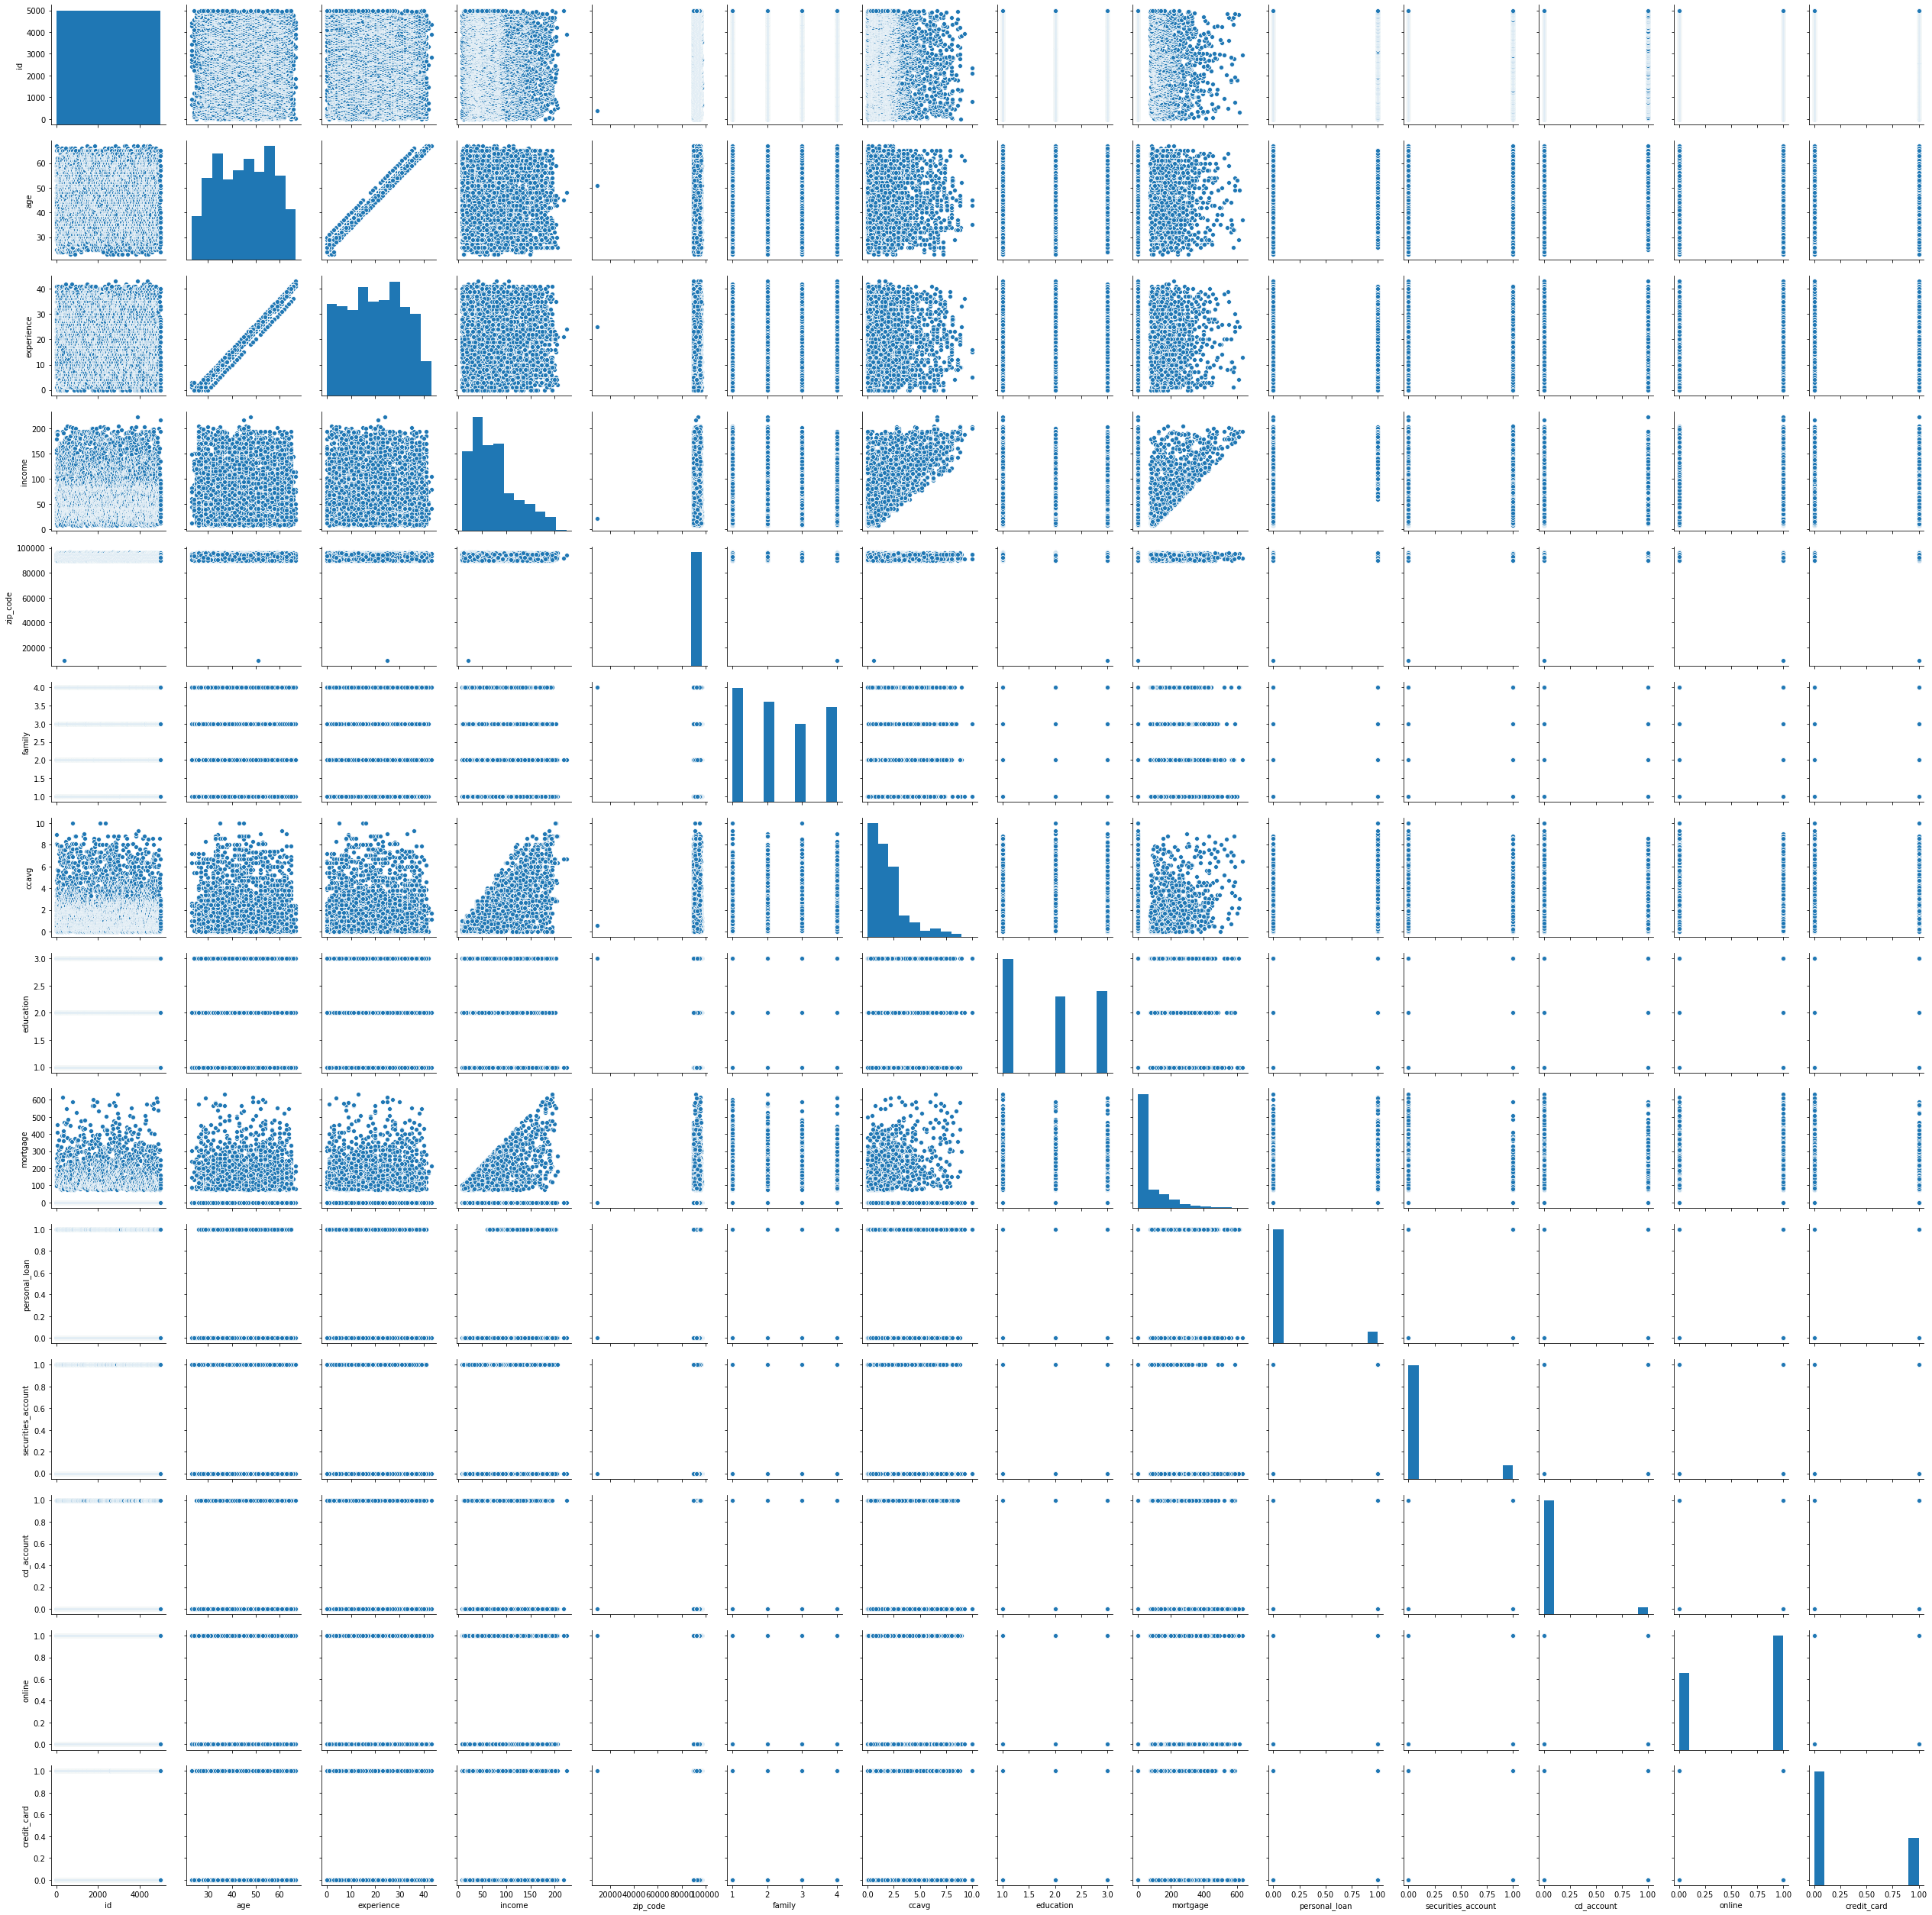

In [13]:
# Pair Plot
sns.pairplot(loan_data)
plt.show()

## Data Distribution: 

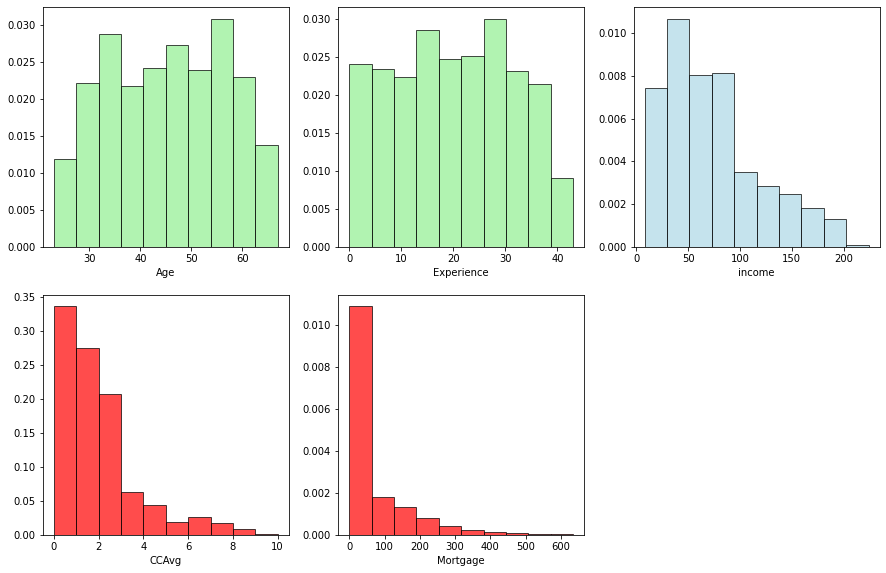

In [14]:
# Data Distribution Continuous variable - Age, Experience, Income, CCAvg, Mortgage

plt.figure(figsize = (15,15))

plt.subplot(3,3,1)
plt.hist(loan_data.age, color = 'lightgreen', edgecolor = 'black', alpha = 0.7, density = True)
plt.xlabel("Age")


plt.subplot(3,3,2)
plt.hist(loan_data.experience, color = 'lightgreen', edgecolor = 'black', alpha = 0.7, density = True)
plt.xlabel("Experience")


plt.subplot(3,3,3)
plt.hist(loan_data.income, color = 'lightblue', edgecolor = 'black', alpha = 0.7, density = True)
plt.xlabel("income")


plt.subplot(3,3,4)
plt.hist(loan_data.ccavg, color = 'red', edgecolor = 'black', alpha = 0.7, density = True)
plt.xlabel("CCAvg")


plt.subplot(3,3,5)
plt.hist(loan_data.mortgage, color = 'red', edgecolor = 'black', alpha = 0.7, density = True)
plt.xlabel("Mortgage")

plt.show()


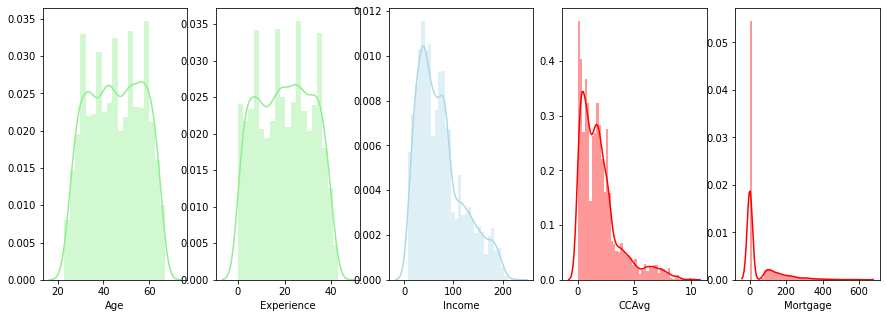

In [15]:
# Continuous variable distribution with seborn library
f, axes = plt.subplots(1,5, figsize=(15,5))
sns.distplot(loan_data['age'], color = 'lightgreen', ax = axes[0], axlabel = 'Age')
sns.distplot(loan_data['experience'], color = 'lightgreen',ax = axes[1], axlabel = 'Experience')
sns.distplot(loan_data['income'], color = 'lightblue', ax = axes[2], axlabel = 'Income')
sns.distplot(loan_data['ccavg'], color = 'red', ax = axes[3], axlabel = 'CCAvg')
sns.distplot(loan_data['mortgage'], color = 'red', ax = axes[4], axlabel = 'Mortgage')
plt.show()

##### Distribution of Continuous Variables:
- 'age' and 'experience' have multimodal data distribution
- 'income' is bit skedwed 
- 'ccavg' & 'mortgage' are heavily skewed positivelly
-  Some customers's avg. credit card spending is colse to mean of the dataset but few spends a lot
- Only lower amount of population have mortgae wherein few have high amount of mortgage

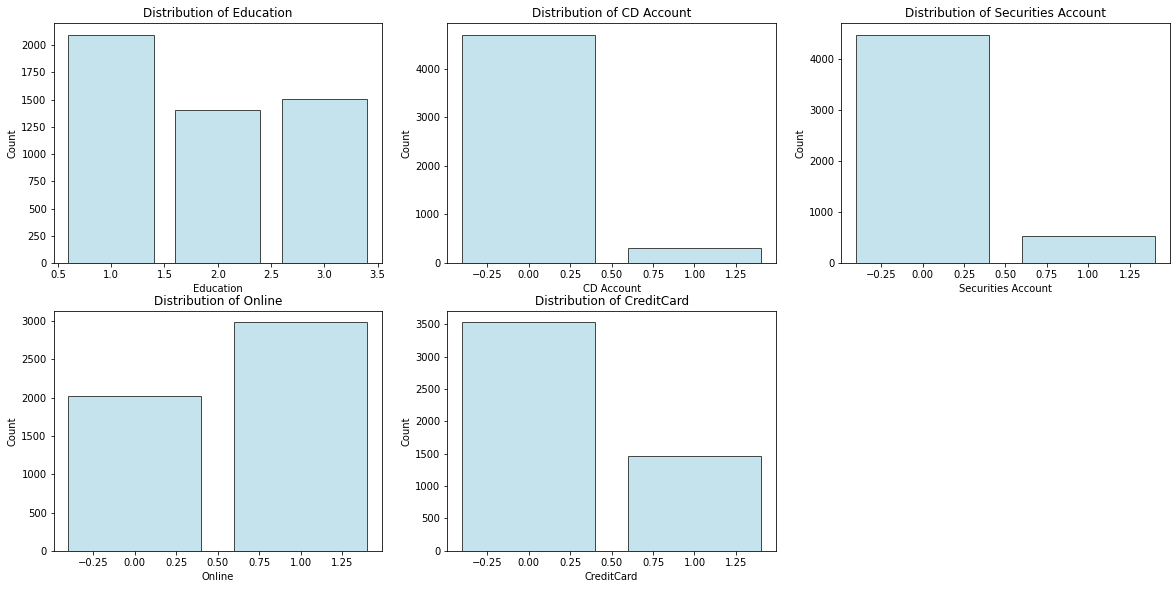

In [16]:
# Data Distribution Categorical - Education, CD Account, Securities Account, Online, CreditCard, ZIP Code
plt.figure(figsize = (20,15))

x = loan_data.education.value_counts().index
y = [loan_data['education'].value_counts()[i] for i in x]
plt.subplot(3,3,1)
plt.bar(x=x, height=y, width=0.8, align='center', color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel("Education")
plt.ylabel("Count")
plt.title("Distribution of Education")

x1 = loan_data.cd_account.value_counts().index
y1 = [loan_data['cd_account'].value_counts()[j] for j in x1]
plt.subplot(3,3,2)
plt.bar(x=x1, height=y1, width=0.8, align='center', color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel("CD Account")
plt.ylabel("Count")
plt.title("Distribution of CD Account")

x2 = loan_data.securities_account.value_counts().index
y2 = [loan_data['securities_account'].value_counts()[k] for k in x2]
plt.subplot(3,3,3)
plt.bar(x=x2, height=y2, width=0.8, align='center', color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel("Securities Account")
plt.ylabel("Count")
plt.title("Distribution of Securities Account")


x3 = loan_data.online.value_counts().index
y3 = [loan_data['online'].value_counts()[l] for l in x3]
plt.subplot(3,3,4)
plt.bar(x=x3, height=y3, width=0.8, align='center', color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel("Online")
plt.ylabel("Count")
plt.title("Distribution of Online")

x4 = loan_data.credit_card.value_counts().index
y4 = [loan_data['credit_card'].value_counts()[m] for m in x4]
plt.subplot(3,3,5)
plt.bar(x=x4, height=y4, width=0.8, align='center', color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel("CreditCard")
plt.ylabel("Count")
plt.title("Distribution of CreditCard")

plt.show()


#### Data distribution of Categorical Variables:
- Around 45% people have undergraduate, 25% have graduate and 30%  have professional level of education
- Around 95% customer do not have CD account and Securities account
- Only 40% customer uses online banking facility
- Only 30% customer uses credit card

### Target Column

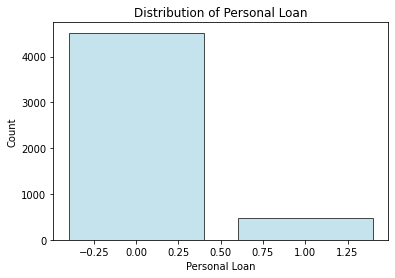

In [17]:
# Distribution of Target Variable - 'Personal loan'

x = loan_data.personal_loan.value_counts().index
y = [loan_data['personal_loan'].value_counts()[i] for i in x]
plt.bar(x=x, height=y, width=0.8, align='center', color = 'lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel("Personal Loan")
plt.ylabel("Count")
plt.title("Distribution of Personal Loan")
plt.show()

##### Data Distribution of Target Column
- Around 9% people availed personal loan

### Outlier Detection

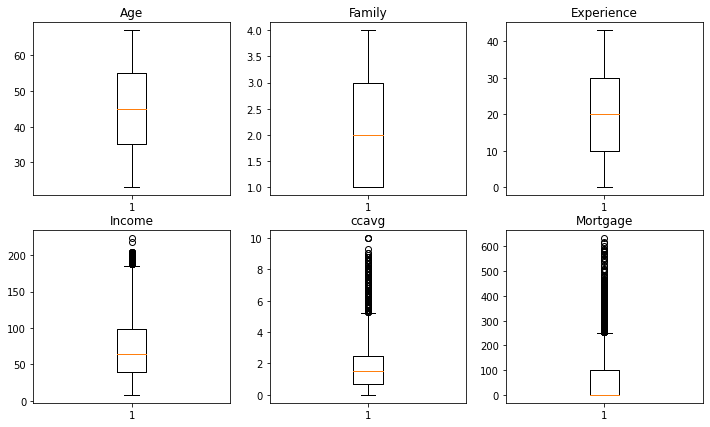

In [18]:
# Outlier Detection- Boxplot 
# Age, Experience, Income, CCAvg, Mortgage
fig, axs = plt.subplots(2,3, figsize = (12,7))

axs[0,0].boxplot(loan_data.age)
axs[0,0].set_title("Age")

axs[0,1].boxplot(loan_data.family)
axs[0,1].set_title("Family")

axs[0,2].boxplot(loan_data.experience)
axs[0,2].set_title("Experience")

axs[1,0].boxplot(loan_data.income)
axs[1,0].set_title("Income")

axs[1,1].boxplot(loan_data.ccavg)
axs[1,1].set_title("ccavg")

axs[1,2].boxplot(loan_data.mortgage)
axs[1,2].set_title("Mortgage")

plt.show()

#####  Decision on Outlier - 
- Age, expirence and family members columns does not have outliers
- Per observation Income, ccavg and Mortgage coulumns have outliers. Since, this are continuous variables, it's possible for
some people to have very high income, much spending on credit card on monthly basis and aquire higher amount of mortgage
- Treating this ouliers depends on business problem i.e. if we are interested only on middle class people buying personal loan
we might have to think of treating them. 
- Since, there is no such assumption, I'm not going to remove them. However, some ML model performs well iresspective to outliers.

### Data Pre-processing

In [19]:
## Spliting dependent & independent features
X = loan_data.drop(["id", "personal_loan"], axis = 1) # id and personal column droped
y = loan_data['personal_loan']

In [20]:
loan_data['zip_code'].describe()

count     5000.000000
mean     93152.503000
std       2121.852197
min       9307.000000
25%      91911.000000
50%      93437.000000
75%      94608.000000
max      96651.000000
Name: zip_code, dtype: float64

##### Zip code represents physical location. It is required to be encode to use in the ML model whthout which it's  numerical values have no statistical significance. 
- I have tried categorical encoding as well as one hot encoding, but label encoding performs better here.

In [21]:
# Encoding zip code:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
loan_data['zip_code'] = label_encoder.fit_transform(loan_data['zip_code'])
loan_data.head()

,id,age,experience,income,zip_code,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,credit_card
0,1,25,1,49,83,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,367,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,298,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,96,4,1.0,2,0,0,0,0,0,1


In [22]:
# Scaling the data
from sklearn import preprocessing

X_scale = preprocessing.scale(X)

##### Scaling is very important when values of repective featues varies significantly like age is 23 and income is 73000 dollar

## Spling Dataset

In [23]:
# Splitting data into 70:30 train & test ratio 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale,y, test_size = 0.30, random_state = 1)

# Training & Testing Model

## Logistics Regression

In [24]:
## Logistics Regression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver = 'liblinear')

# Training the model
log_reg.fit(X_train, y_train)

# Testing the model
logistic_prediction = log_reg.predict(X_test)

# Coeficient & Intercept
coeff_log = pd.DataFrame(log_reg.coef_)
inter_log = log_reg.intercept_
print("Coefficients for logistic regression:\n", coeff_log)
print("\n")
print("Intercept for logistic regression:", inter_log)

Coefficients for logistic regression:
           0         1         2       3         4         5         6  \
0 -0.068943  0.121804  2.312007  0.0189  0.780089  0.294966  1.348664   

          7         8         9        10        11  
0  0.077701 -0.341303  0.871345 -0.285958 -0.499157  


Intercept for logistic regression: [-4.56872656]


In [25]:
# Accuracy on train data 
log_score_train = log_reg.score(X_train, y_train)

# Accuracy on test data
log_score_test = log_reg.score(X_test, y_test)

print("Accuracy on train & test data: {:.2f}% & {:.2f}% respectively".format(log_score_train*100, log_score_test*100))


Accuracy on train & test data: 95.34% & 94.80% respectively


In [26]:
# Confusion Matric- Logistric regression
conf_matrix_logistics = metrics.confusion_matrix(y_test,logistic_prediction)
print("Confusion Matrix - Logistic Regression\n", conf_matrix_logistics)


Confusion Matrix - Logistic Regression
 [[1335   16]
 [  62   87]]


## kNN Algorithm

In [27]:
#kNN 
from sklearn.neighbors import KNeighborsClassifier

k_values = [3,5,7,11,13]
for i in k_values:
    knn_model = KNeighborsClassifier( n_neighbors=i, weights = 'distance')

    # Training the model
    knn_model.fit(X_train, y_train)

    # Testing the model
    knn_prediction = knn_model.predict(X_test)
    
    # Accuracy on train data
    knn_score_train = knn_model.score(X_train, y_train)
        
    # Accuracy on test data
    knn_score_test = knn_model.score(X_test, y_test)
    print("For k value = {}, accuracy on training & testing data are:\t {:.2f}% & {:.2f}%".format(i, knn_score_train*100,
                                                                                       knn_score_test*100))

For k value = 3, accuracy on training & testing data are:	 100.00% & 94.93%
For k value = 5, accuracy on training & testing data are:	 100.00% & 94.87%
For k value = 7, accuracy on training & testing data are:	 100.00% & 94.80%
For k value = 11, accuracy on training & testing data are:	 100.00% & 94.60%
For k value = 13, accuracy on training & testing data are:	 100.00% & 94.53%


In [28]:
# Confusion Matric- kNN
conf_matrix_kNN = metrics.confusion_matrix(y_test,knn_prediction)
print("Confusion Matrix - kNN\n", conf_matrix_kNN)


Confusion Matrix - kNN
 [[1350    1]
 [  81   68]]


## Naive Bayes Algorithm:

In [29]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Training the model
gnb.fit(X_train, y_train)

# Testing the model
gnb_predict = gnb.predict(X_test)

# Accuracy on Training dataset:
gnb_score_train = gnb.score(X_train, y_train)

# Accuracy on Testing dataset:
gnb_score_test = gnb.score(X_test, y_test)

print('Accuracy for Naive Bayes Model on train & test data: {:.2f}% & {:.2f}% respectively'.format(gnb_score_train*100, 
                                                                                                   gnb_score_test*100))

Accuracy for Naive Bayes Model on train & test data: 89.03% & 87.67% respectively


In [30]:
# Confusion Matric- Naive Bayes
conf_matrix_nb = metrics.confusion_matrix(y_test,gnb_predict)
print("Confusion Matrix - Naive Bayes\n", conf_matrix_nb)


Confusion Matrix - Naive Bayes
 [[1231  120]
 [  65   84]]


## SVM Algorithm:

In [31]:
# SVM
from sklearn.svm import SVC
svm_clf = SVC(kernel = 'rbf', C=1, gamma = 'auto')

# Training the model:
svm_clf.fit(X_train, y_train)

# Testing the model:
svm_predict = svm_clf.predict(X_test)

# Accuracy on Training dataset:
svm_score_train = svm_clf.score(X_train, y_train)

# Accuracy on Testing dataset:
svm_score_test = svm_clf.score(X_test, y_test)

print('Accuracy for Support Vector Machine on train & test data: {:.2f}% & {:.2f}% respectively'.format(svm_score_train*100,
                                                                                               svm_score_test*100))

Accuracy for Support Vector Machine on train & test data: 98.14% & 96.73% respectively


In [32]:
# Confusion Matric- SVM
conf_matrix_svm = metrics.confusion_matrix(y_test,svm_predict)
print("Confusion Matrix - Support Vector Machine\n", conf_matrix_svm)


Confusion Matrix - Support Vector Machine
 [[1347    4]
 [  45  104]]


## Evaluation

##### Model Performance Overview : 

|Model| Accuracy Train | Accuracy Test |
|-----|----|----|
|Logistic Regression|    95.34%      |  94.80%       |
|kNN|    100%        |  94.93%       |
|Naive Bayes|    89.03%      |  87.67%       |
|Support Vector Machine|    98.14%      |  96.73%       |


##### Observations: 
1. For all four models, accuracy on training data is high compaired to test data. We can say this as overfitting to some 
extend wherein kNN(k=3) is extreme. 
2. Logistic Regression and kNN both gives similar accuracy on test data even though kNN is more overfitting.
3. Support Vector Maching gives higher performance among all four models. 


#### Why SVM Works Best- 
1. SVM is not affected by outliers.
2. It provides higher accuracy 96.73% amoung all other models.
3. SVM is able to make better non linear decision boundary. I've checked with linear kernel but it gives around 94.70% of 
acuracy. But it performs better after using radial basis fucntion.
4. It is computationally more efficient becasue of using kernal trick in dual problem.


## Conclusion:
The data analysis is done on banking data whether customer would avail personal loan or not. Basic EDA and data distribution
for respectives fatures is performed. Data pre-processing is done before fitting various supervised models. In this project, 
supervised algorithms i.e. Logistic regression, kNN, Naive Bayes and Support Vector Machine are used. Among all the models,
SVM gives best accuracy. 